In [2]:
# setup
import numpy as np
import gzip
import numpy as np
import math
import matplotlib.pyplot as plt


In [3]:
def set_binary_labels_by_digit(labels_in, digit):
    d = np.zeros((labels_in.shape[0],1))

    for i in range(labels_in.shape[0]):
        if labels_in[i] == digit:
            d[i] = 1
        else:
            d[i] = -1
    
    return d


In [4]:
def select_random_subset(features, labels, subset_size):
    set_indices = np.arange(labels.shape[0])
    subset_indices = np.random.choice(set_indices,5,replace=False)
    
    subset_features = np.zeros((subset_size, features.shape[1]))
    subset_labels = np.zeros((subset_size, 1))
    
    for i, subset_index in enumerate(subset_indices):
        subset_features[i] = features[subset_index]
        subset_labels[i] = labels[subset_index]
        
    return subset_features, subset_labels

SyntaxError: invalid syntax (<ipython-input-4-49adb0a9d187>, line 1)

# Data Imports

In [8]:
# specify size of images
image_rows = 28
image_cols = 28

## Training data and labels

In [9]:
# open training set image file
f = gzip.open('train-images-idx3-ubyte.gz','r')

num_train_images = 60000

f.read(16)
buf = f.read(image_rows * image_cols * num_train_images)
train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train_data = train_data.reshape(num_train_images, image_rows, image_cols,1)

In [10]:
# open training set label file

f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)

buf = f.read(num_train_images)
train_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train_labels = train_labels.reshape(num_train_images,1)

training data: (60000, 28, 28, 1) 

image index 0:


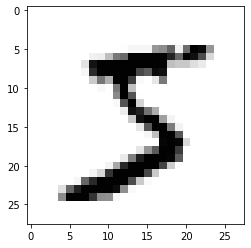

label: [5.]
(28, 28, 1)
(28, 28)


In [11]:
# troubleshoot data import

ind = 0

print('training data:', train_data.shape, '\n')

# print training image
print('image index ' + str(ind) + ':')
image = np.asarray(train_data[ind]).squeeze()
#plt.title(['image index', ind])
plt.imshow(image, cmap='Greys')
plt.show()
# print training label
print('label:', train_labels[ind])

print(train_data[ind].shape)
print(image.shape)

## Test data and labels

In [12]:
# open test set image file
f = gzip.open('t10k-images-idx3-ubyte.gz','r')

num_test_images = 10000

f.read(16)
buf = f.read(image_rows * image_cols * num_test_images)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_test_images, image_rows, image_cols,1)

In [13]:
# open test set label file

f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(num_test_images)
test_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_labels = test_labels.reshape(num_test_images,1)

test data: (10000, 28, 28, 1)
image index 0:


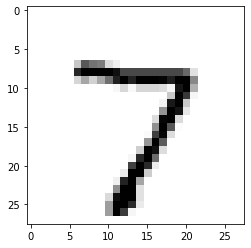

label: [7.]


In [14]:
# troubleshoot test data import

ind = 0

print('test data:', test_data.shape)

# print training image
print('image index ' + str(ind) + ':')
image = np.asarray(test_data[ind]).squeeze()
#plt.title(['image index', ind])
plt.imshow(image, cmap='Greys')
plt.show()
# print training label
print('label:', test_labels[ind])

# Least Sqaures Classification with Ridge Regression

In [24]:
# optimize best regularizer
lamdas = np.logspace(-1,4,num=12)
digits = np.array([0,1,2,3,4,5,6,7,8,9])

# normalize array and reshape into flattened image vectors, and shuffle randomly
A_opt = train_data.reshape(num_train_images, image_rows*image_cols)/255
d_opt = train_labels

# randomly shuffle
A_opt = np.hstack((A_opt, d_opt))
np.random.shuffle(A_opt)
d_opt = A_opt[:,-1:]
A_opt = A_opt[:,:-1]

# find best lamda for all binary classifiers
A_train = A_opt[:50000,:]
A_eval = A_opt[50000:,:]
avg_error_rate_by_lamda = [0] * len(lamdas)

# for every lamda, get avg error rate over all digits
for i, lamda in enumerate(lamdas):

    error_rate_by_digit = [0] * len(digits)
    
    # get error rate for every digit
    for digit in digits:
        
        # train with first 50K
        d_train = set_binary_labels_by_digit(d_opt[:50000,:], digit)
        w = np.linalg.inv(A_train.T@A_train+lamda*np.identity(A_train.shape[1]))@A_train.T@d_train
        
        # evaluate classifier with last 10K
        d_eval = set_binary_labels_by_digit(d_opt[50000:,:], digit)
        d_hat_eval = np.sign(A_eval@w)
        errors = np.count_nonzero(d_eval-d_hat_eval!=0)
        #print(digit, errors)
        error_rate_by_digit[digit] = (errors/d_hat_eval.shape[0])
        
    avg_error_rate_by_lamda[i] = np.average(error_rate_by_digit)
    print('lamda:', np.round(lamda,3), '- avg:', np.round(avg_error_rate_by_lamda[i],5), '-', error_rate_by_digit)

print('\nlamdas:\n', np.round(lamdas,3), '\naverage error:\n', np.round(avg_error_rate_by_lamda,5), '\n')

#pick lamda with lowest avg error rate
lamda = lamdas[np.argmin(avg_error_rate_by_lamda)]
print('best lamda:', lamda)


lamda: 0.1 - avg: 0.03717 - [0.0167, 0.0176, 0.0371, 0.0431, 0.0291, 0.0517, 0.0263, 0.0301, 0.0617, 0.0583]
lamda: 0.285 - avg: 0.03713 - [0.0167, 0.0175, 0.0371, 0.0432, 0.0291, 0.0516, 0.0262, 0.0301, 0.0617, 0.0581]
lamda: 0.811 - avg: 0.03717 - [0.0167, 0.0175, 0.0372, 0.0432, 0.0292, 0.0515, 0.0261, 0.0301, 0.062, 0.0582]
lamda: 2.31 - avg: 0.03715 - [0.0168, 0.0175, 0.0371, 0.0432, 0.0292, 0.0515, 0.026, 0.03, 0.062, 0.0582]
lamda: 6.579 - avg: 0.03715 - [0.0168, 0.0175, 0.037, 0.0431, 0.0292, 0.0514, 0.0258, 0.0299, 0.062, 0.0588]
lamda: 18.738 - avg: 0.03714 - [0.0166, 0.0174, 0.0368, 0.043, 0.0293, 0.0516, 0.0256, 0.03, 0.062, 0.0591]
lamda: 53.367 - avg: 0.0372 - [0.0167, 0.0171, 0.0369, 0.0429, 0.0298, 0.0521, 0.0254, 0.0299, 0.0619, 0.0593]


KeyboardInterrupt: 

In [11]:
# train classifier with optimized regularizer

A_train = train_data.reshape(num_train_images, image_rows*image_cols)/255
A_test = test_data.reshape(num_test_images, image_rows*image_cols)/255

W = np.zeros((A_train.shape[1],len(digits)))
print(W.shape)

# train and test classifier for every digit
train_error_rate_by_digit = [0] * len(digits)
test_error_rate_by_digit = [0] * len(digits)

for digit in digits:

    # train classifier with optimized lamda and training data
    d_train = set_binary_labels_by_digit(train_labels, digit)
    W[:,digit:digit+1] = np.linalg.inv(A_train.T@A_train+lamda*np.identity(A_train.shape[1]))@A_train.T@d_train
    
    # find training error
    d_hat_train = np.sign(A_train@W[:,digit:digit+1])
    errors = np.count_nonzero(d_train-d_hat_train!=0)
    train_error_rate_by_digit[digit] = (errors/d_hat_train.shape[0])
    
    # test trained classifier with test data
    d_test = set_binary_labels_by_digit(test_labels, digit)
    d_hat_test = np.sign(A_test@W[:,digit:digit+1])
    errors = np.count_nonzero(d_test-d_hat_test!=0)
    test_error_rate_by_digit[digit] = (errors/d_hat_test.shape[0])
    
print('avg training error:', np.average(train_error_rate_by_digit))
print('avg test error:', np.average(test_error_rate_by_digit))




(784, 10)
avg training error: 0.03665
avg test error: 0.03662


# LASSO

In [28]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        print('lamda:',each_lambda)
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [ ]:
# optimize best regularizer
lamdas = np.logspace(-2,3,num=12)
digits = np.array([0,1,2,3,4,5,6,7,8,9])

# normalize array and reshape into flattened image vectors
A_opt = train_data.reshape(num_train_images, image_rows*image_cols)/255
d_opt = train_labels

# randomly shuffle
A_opt = np.hstack((A_opt, d_opt))
np.random.shuffle(A_opt)
d_opt = A_opt[:,-1:]
A_opt = A_opt[:,:-1]

# find best lamda for all binary classifiers
A_train = A_opt[:50000,:]
A_eval = A_opt[50000:,:]
avg_error_rate_by_lamda = [0] * len(lamdas)
print(A_opt.shape)
   
# get error rate for every digit
error_rates = np.zeros((len(digits),len(lamdas)))
for digit in digits:
    print(digit)
    # train with first 50K
    d_train = set_binary_labels_by_digit(d_opt[:50000,:], digit)
    W = ista_solve_hot(A_train,d_train,lamdas)

    # evaluate classifier with last 10K
    d_eval = set_binary_labels_by_digit(d_opt[50000:,:], digit)
    d_hat_eval = np.sign(A_eval@W)
    errors = np.count_nonzero(d_eval-d_hat_eval!=0,axis=0)
    error_rates[digit] = (errors/d_hat_eval.shape[0])
    print(digit, error_rates[digit])

print(error_rates)
avg_error_rate_by_lamda = np.average(error_rates, axis=0)
print('lamdas:\n', lamdas, '\n', avg_error_rate_by_lamda, '\n')

#pick lamda with lowest avg error rate
lamda = np.array([lamdas[np.argmin(avg_error_rate_by_lamda)]])
print('best lamda:', lamda)

(50000, 784)
lamda: 0.01
lamda: 0.02848035868435802
lamda: 0.08111308307896872
lamda: 0.23101297000831592
lamda: 0.6579332246575679
lamda: 1.873817422860383
lamda: 5.336699231206307
lamda: 15.199110829529332
lamda: 43.28761281083057
lamda: 123.28467394420659
lamda: 351.11917342151276
lamda: 1000.0
0 [0.0188 0.0188 0.0188 0.0188 0.0188 0.0188 0.0188 0.0188 0.0188 0.0188
 0.0193 0.0215]
lamda: 0.01


In [14]:

#pick lamda with lowest avg error rate
lamda = np.array([lamdas[np.argmin(avg_error_rate_by_lamda)]])
print('best lamda:', lamda)

best lamda: [15.19911083]


In [15]:
# train classifier with optimized regularizer

A_train = train_data.reshape(num_train_images, image_rows*image_cols)/255
A_test = test_data.reshape(num_test_images, image_rows*image_cols)/255

W = np.zeros((A_train.shape[1],len(digits)))
print(W.shape)

# train and test classifier for every digit
train_error_rate_by_digit = [0] * len(digits)
test_error_rate_by_digit = [0] * len(digits)

for digit in digits:
    #print(digit)
    # train classifier with optimized lamda and training data
    d_train = set_binary_labels_by_digit(train_labels, digit)
    W[:,digit:digit+1] = ista_solve_hot(A_train,d_train,lamda)
    
    # find training error
    d_hat_train = np.sign(A_train@W[:,digit:digit+1])
    errors = np.count_nonzero(d_train-d_hat_train!=0)
    train_error_rate_by_digit[digit] = (errors/d_hat_train.shape[0])
    
    # test trained classifier with test data
    d_test = set_binary_labels_by_digit(test_labels, digit)
    d_hat_test = np.sign(A_test@W[:,digit:digit+1])
    errors = np.count_nonzero(d_test-d_hat_test!=0)
    test_error_rate_by_digit[digit] = (errors/d_hat_test.shape[0])

print('training errors:', train_error_rate_by_digit)
print('test errors:', test_error_rate_by_digit)

print('avg training error:', np.average(train_error_rate_by_digit))
print('avg test error:', np.average(test_error_rate_by_digit))

(784, 10)
training errors: [0.0187, 0.017933333333333332, 0.03961666666666667, 0.04688333333333333, 0.03626666666666667, 0.0615, 0.023683333333333334, 0.0284, 0.07098333333333333, 0.06953333333333334]
test errors: [0.0156, 0.0162, 0.0397, 0.0452, 0.0362, 0.0589, 0.0249, 0.0283, 0.0752, 0.0659]
avg training error: 0.041350000000000005
avg test error: 0.04061


# SVM

In [16]:
from sklearn.svm import LinearSVC


A_train = train_data.reshape(num_train_images, image_rows*image_cols)/255
A_test = test_data.reshape(num_test_images, image_rows*image_cols)/255

n_train = np.size(A_train[:,0:1])
n_test = np.size(A_test[:,0:1])

A_train_1 = np.hstack((A_train, np.ones((n_train,1)) ))
A_test_1 = np.hstack((A_test, np.ones((n_test,1)) ))



# train and test classifier for every digit
train_error_rate_by_digit = [0] * len(digits)
test_error_rate_by_digit = [0] * len(digits)
digits = np.array([0,1,2,3,4,5,6,7,8,9])
W = np.zeros((A_train_1.shape[1],len(digits)))
print(W.shape)

for digit in digits:

   # Train classifier using linear SVM from SK Learn library
    clf = LinearSVC(random_state=0, dual=False)
    d_train = set_binary_labels_by_digit(train_labels, digit)
    clf.fit(A_train_1, np.squeeze(d_train))
    W[:,digit:digit+1] = clf.coef_.transpose()
    #print('done training', digit)
    
    # find training error
    d_hat_train = np.sign(A_train_1@W[:,digit:digit+1])
    errors = np.count_nonzero(d_train-d_hat_train!=0)
    train_error_rate_by_digit[digit] = (errors/d_hat_train.shape[0])
    #print(digit, 'training error:', train_error_rate_by_digit[digit])

    
    # test trained classifier with test data
    d_test = set_binary_labels_by_digit(test_labels, digit)
    d_hat_test = np.sign(A_test_1@W[:,digit:digit+1])
    errors = np.count_nonzero(d_test-d_hat_test!=0)
    test_error_rate_by_digit[digit] = (errors/d_hat_test.shape[0])
    #print(digit, 'test error:', est_error_rate_by_digit[digit])

    
print('avg training error:', np.average(train_error_rate_by_digit))
print('avg test error:', np.average(test_error_rate_by_digit))


(785, 10)
avg training error: 0.04383
avg test error: 0.04546


In [ ]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_outlier, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))

# k-means clustering

In [ ]:
def kMeans(X, K, maxIters = 20):

    centroids = X[np.random.choice(len(X), K)]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([(x_i-y_k)@(x_i-y_k) for y_k in centroids]) for x_i in X])
        # Update centroids step 
        centroids = []
        for k in range(K):
            if (C == k).any():
                centroids.append( X[C == k].mean(axis = 0) )
            else: # if there are no data points assigned to this certain centroid
                centroids.append( X[np.random.choice(len(X))] )
    return np.array(centroids) , C

In [ ]:
A_train = train_data.reshape(num_train_images, image_rows*image_cols)/255

centroids, C = kMeans(A_train, K = 10)

In [ ]:

print('centroid assigned = ',C, sep="\n", end='\n\n')
print('centroids =', centroids.T.round(3), sep="\n", end='\n\n')